In [ ]:
# Importing Keras for Image Classification
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# CNN Model

model = Sequential()

# Convolutional Layer with input shape (256,256,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
#model.add(Dense(units=256, activation='relu'))
#model.add(Dropout(rate=0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Augment data with random rotations
    width_shift_range=0.2,  # Augment data with random width shifts
    height_shift_range=0.2, # Augment data with random height shifts
    shear_range=0.2,        # Augment data with random shear
    zoom_range=0.2,         # Augment data with random zoom
    horizontal_flip=True,   # Augment data with horizontal flips
    fill_mode='nearest'     # Fill mode for transformations
)



In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255)
val_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory= r"C:\Users\user\Documents\Tazin\Oral_Cancer\Oral_Cancer\train",target_size=(224,224),  batch_size=32, class_mode = 'binary' )

Found 622 images belonging to 2 classes.


In [ ]:
train_data.class_indices


{'cancer': 0, 'non_cancer': 1}

In [ ]:
val_data = val_datagen.flow_from_directory(directory= r"C:\Users\user\Documents\Tazin\Oral_Cancer\Oral_Cancer\validate",target_size=(224,224), batch_size=32, class_mode = 'binary')

Found 133 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(directory= r"C:\Users\user\Documents\Tazin\Oral_Cancer\Oral_Cancer\test", target_size=(224,224), batch_size=32, class_mode = 'binary')

Found 134 images belonging to 2 classes.


In [ ]:
mc = ModelCheckpoint(filepath=r"C:\Users\user\Documents\Tazin\Oral_Cancer\model\oral_cancer_best_model.hdf5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto');
call_back = [ mc ];

In [ ]:
# Fitting the Model
cnn = model.fit(train_data,
                  steps_per_epoch = 2,
                  epochs = 150,
                  validation_data = val_data,
                  validation_steps = 2,
                  callbacks = call_back )

Epoch 1/150
2/2 [==============================] - ETA: 0s - loss: 0.7904 - accuracy: 0.5156
Epoch 1: val_accuracy improved from -inf to 0.45312, saving model to C:\Users\user\Documents\Tazin\Oral_Cancer\model\oral_cancer_best_model.hdf5
2/2 [==============================] - 6s 3s/step - loss: 0.7904 - accuracy: 0.5156 - val_loss: 1.4884 - val_accuracy: 0.4531
Epoch 2/150
2/2 [==============================] - ETA: 0s - loss: 1.2161 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.45312
2/2 [==============================] - 5s 3s/step - loss: 1.2161 - accuracy: 0.5000 - val_loss: 0.7079 - val_accuracy: 0.4219
Epoch 3/150
2/2 [==============================] - ETA: 0s - loss: 0.6909 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.45312
2/2 [==============================] - 5s 3s/step - loss: 0.6909 - accuracy: 0.5000 - val_loss: 0.6954 - val_accuracy: 0.4062
Epoch 4/150
2/2 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.4688
Epo

2/2 [==============================] - 5s 3s/step - loss: 0.6577 - accuracy: 0.6250 - val_loss: 0.6406 - val_accuracy: 0.6562
Epoch 30/150
2/2 [==============================] - ETA: 0s - loss: 0.6874 - accuracy: 0.5312
Epoch 30: val_accuracy did not improve from 0.65625
2/2 [==============================] - 5s 3s/step - loss: 0.6874 - accuracy: 0.5312 - val_loss: 0.6299 - val_accuracy: 0.6562
Epoch 31/150
2/2 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.6094
Epoch 31: val_accuracy did not improve from 0.65625
2/2 [==============================] - 5s 3s/step - loss: 0.6545 - accuracy: 0.6094 - val_loss: 0.6643 - val_accuracy: 0.6094
Epoch 32/150
2/2 [==============================] - ETA: 0s - loss: 0.6327 - accuracy: 0.6406
Epoch 32: val_accuracy did not improve from 0.65625
2/2 [==============================] - 5s 3s/step - loss: 0.6327 - accuracy: 0.6406 - val_loss: 0.6600 - val_accuracy: 0.5781
Epoch 33/150
2/2 [==============================] - ETA: 0

Epoch 59/150
2/2 [==============================] - ETA: 0s - loss: 0.6092 - accuracy: 0.6562
Epoch 59: val_accuracy did not improve from 0.70312
2/2 [==============================] - 5s 3s/step - loss: 0.6092 - accuracy: 0.6562 - val_loss: 0.7510 - val_accuracy: 0.4531
Epoch 60/150
2/2 [==============================] - ETA: 0s - loss: 0.5699 - accuracy: 0.6875
Epoch 60: val_accuracy did not improve from 0.70312
2/2 [==============================] - 5s 3s/step - loss: 0.5699 - accuracy: 0.6875 - val_loss: 0.7088 - val_accuracy: 0.4688
Epoch 61/150
2/2 [==============================] - ETA: 0s - loss: 0.5641 - accuracy: 0.6875
Epoch 61: val_accuracy did not improve from 0.70312
2/2 [==============================] - 5s 3s/step - loss: 0.5641 - accuracy: 0.6875 - val_loss: 0.6360 - val_accuracy: 0.5781
Epoch 62/150
2/2 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.6562
Epoch 62: val_accuracy did not improve from 0.70312
2/2 [==============================] -

Epoch 89/150
2/2 [==============================] - ETA: 0s - loss: 0.3234 - accuracy: 0.8906
Epoch 89: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.3234 - accuracy: 0.8906 - val_loss: 0.7320 - val_accuracy: 0.6094
Epoch 90/150
2/2 [==============================] - ETA: 0s - loss: 0.4878 - accuracy: 0.7500
Epoch 90: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.4878 - accuracy: 0.7500 - val_loss: 0.6680 - val_accuracy: 0.6875
Epoch 91/150
2/2 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.7656
Epoch 91: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.4145 - accuracy: 0.7656 - val_loss: 0.7454 - val_accuracy: 0.7031
Epoch 92/150
2/2 [==============================] - ETA: 0s - loss: 0.4544 - accuracy: 0.7188
Epoch 92: val_accuracy did not improve from 0.78125
2/2 [==============================] -

Epoch 119/150
2/2 [==============================] - ETA: 0s - loss: 0.2725 - accuracy: 0.8750
Epoch 119: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.2725 - accuracy: 0.8750 - val_loss: 1.0095 - val_accuracy: 0.6094
Epoch 120/150
2/2 [==============================] - ETA: 0s - loss: 0.2501 - accuracy: 0.9219
Epoch 120: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.2501 - accuracy: 0.9219 - val_loss: 1.0287 - val_accuracy: 0.5781
Epoch 121/150
2/2 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.8438
Epoch 121: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.2600 - accuracy: 0.8438 - val_loss: 0.9648 - val_accuracy: 0.6406
Epoch 122/150
2/2 [==============================] - ETA: 0s - loss: 0.2518 - accuracy: 0.8906
Epoch 122: val_accuracy did not improve from 0.78125
2/2 [=========================

Epoch 149/150
2/2 [==============================] - ETA: 0s - loss: 0.1200 - accuracy: 0.9531
Epoch 149: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.1200 - accuracy: 0.9531 - val_loss: 1.6011 - val_accuracy: 0.6406
Epoch 150/150
2/2 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 1.0000
Epoch 150: val_accuracy did not improve from 0.78125
2/2 [==============================] - 5s 3s/step - loss: 0.0972 - accuracy: 1.0000 - val_loss: 2.1871 - val_accuracy: 0.6562


In [ ]:
# Loading the Best Fit Model
model = load_model("./model/oral_cancer_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model
# accuracy = model.evaluate_generator(generator= test_data)[1]
loss, accuracy = model.evaluate(test_data)
print(f"The accuracy of the model is = {accuracy*100} %")

5/5 [==============================] - 1s 236ms/step - loss: 0.6307 - accuracy: 0.7090
The accuracy of the model is = 70.89552283287048 %


In [ ]:
h =  cnn.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt


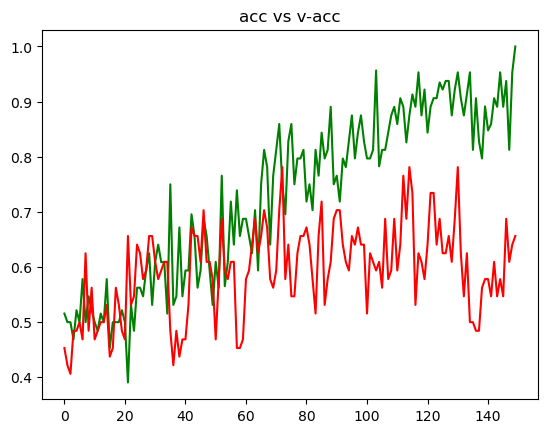

In [ ]:
# Ploting Accuracy In Training Set & Validation Set
plt.plot(h['accuracy'], c="green")
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

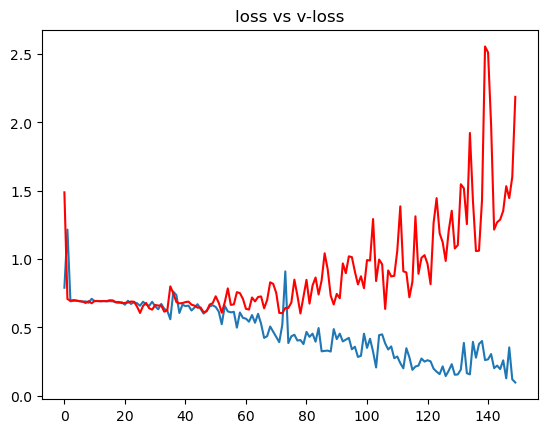

In [ ]:
# Ploting Loss In Training Set & Validation Set
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
import os
import cv2
import numpy as np

In [ ]:
root_folder  = r'C:\Users\user\Documents\Tazin\Oral_Cancer\Oral_Cancer\test'

subfolders = ['cancer', 'non_cancer']

In [ ]:
# Preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB (Keras default)
    image = cv2.resize(image, (224, 224))  # Resize to match the model's input size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image


In [ ]:
test_data=[]
test_path =[]
for subfolder in subfolders:
    subfolder_path = os.path.join(root_folder, subfolder)

    # Make sure the subfolder exists
    if not os.path.exists(subfolder_path):
        print(f"Subfolder '{subfolder}' not found in the root folder.")
        continue



    # Iterate through image files in the subfolder
    for filename in os.listdir(subfolder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Add more extensions if needed
            image_path = os.path.join(subfolder_path, filename)
            test_path.append(image_path)
            #print(classify_class(image_path))
            test_data.append(preprocess_image(image_path))
            # Read the image using OpenCV
            #image = cv2.imread(image_path)





In [ ]:
test_data = np.array(test_data)
test_data.shape

(134, 224, 224, 3)

In [ ]:
predictions = model.predict(test_data)


5/5 [==============================] - 1s 231ms/step


In [ ]:
len(predictions)

134

In [ ]:
def greater_than_half_array(arr):
    return np.where(arr > 0.5, 1, 0)

In [ ]:
result_array = greater_than_half_array(predictions)
result_array

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
result_array = np.array(result_array)

In [ ]:
result_array

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
def classify_class(path):


# Split the path using the path separator
    path_parts = path.split('\\')

    # Extract the class name (second-to-last element of the path)
    class_name = path_parts[-2]

    return class_name



In [ ]:
import matplotlib.pyplot as plt

# Define class labels (adjust as needed)
class_labels = ['cancer', 'non_cancer']  # Replace with your class labels
true_positive=[]
true_negative=[]
false_positive=[]
false_negative=[]
# Visualize predictions
for i in range(len(result_array)):
    predicted_class_index = result_array[i][0]
    predicted_class_label = class_labels[predicted_class_index]
    true_class_label = classify_class(test_path[i])
    print("p {}  t {}".format(predicted_class_label, true_class_label) )

    if predicted_class_label=='cancer' and true_class_label=='cancer' :

        true_positive.append(test_path[i])
    elif predicted_class_label=='cancer' and true_class_label=='non_cancer' :

        false_positive.append(test_path[i])
    elif predicted_class_label=='non_cancer' and true_class_label=='non_cancer' :

        true_negative.append(test_path[i])
    elif predicted_class_label=='non_cancer' and true_class_label=='cancer' :

        false_negative.append(test_path[i])



    #plt.figure(figsize=(6, 6))
    #plt.imshow(test_data[i])
    #plt.title(f'Predicted: {predicted_class_label}')
    #plt.axis('off')
    #plt.show()



p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p non_cancer  t cancer
p non_cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p non_cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer
p cancer  t cancer


In [ ]:
test_data

array([[[[0.09411765, 0.09411765, 0.10196078],
         [0.09411765, 0.09411765, 0.10196078],
         [0.09803922, 0.09019608, 0.09411765],
         ...,
         [0.10196078, 0.23921569, 0.2627451 ],
         [0.10196078, 0.22352941, 0.24313725],
         [0.09019608, 0.21176471, 0.23137255]],

        [[0.09411765, 0.09411765, 0.10196078],
         [0.09411765, 0.09411765, 0.10196078],
         [0.09803922, 0.09019608, 0.09411765],
         ...,
         [0.10196078, 0.23137255, 0.25098039],
         [0.09803922, 0.21960784, 0.23921569],
         [0.09411765, 0.20784314, 0.23137255]],

        [[0.09411765, 0.09411765, 0.10196078],
         [0.09411765, 0.09411765, 0.10196078],
         [0.09803922, 0.09019608, 0.09411765],
         ...,
         [0.11372549, 0.22745098, 0.25098039],
         [0.11372549, 0.21960784, 0.24705882],
         [0.10980392, 0.21960784, 0.23529412]],

        ...,

        [[0.61568627, 0.5372549 , 0.50980392],
         [0.61176471, 0.53333333, 0.50588235]

In [ ]:
test_path

['C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_375.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_376.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_377.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_378.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_379.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_380.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_381.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_382.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_383.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_384.jpg',
 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cance

In [ ]:
image_path = 'C:\\Users\\user\\Documents\\Tazin\\Oral_Cancer\\Oral_Cancer\\test\\cancer\\cancer_375.jpg'

# Split the path using the path separator
path_parts = image_path.split('\\')

# Extract the class name (second-to-last element of the path)
class_name = path_parts[-2]

print("Class Name:", class_name)

Class Name: cancer


In [ ]:
TP=len(true_positive)

In [ ]:
TN=len(true_negative)

In [ ]:
FN=len(false_negative)

In [ ]:
FP=len(false_positive)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_true=[1] * (TP + FN) + [0] * (FP + TN), y_pred=[1] * TP + [0] * FP + [1] * FN + [0] * TN)

# Calculate metrics
accuracy = accuracy_score(y_true=[1] * (TP + FN) + [0] * (FP + TN), y_pred=[1] * TP + [0] * FP + [1] * FN + [0] * TN)
precision = precision_score(y_true=[1] * (TP + FN) + [0] * (FP + TN), y_pred=[1] * TP + [0] * FP + [1] * FN + [0] * TN)
recall = recall_score(y_true=[1] * (TP + FN) + [0] * (FP + TN), y_pred=[1] * TP + [0] * FP + [1] * FN + [0] * TN)
f1 = f1_score(y_true=[1] * (TP + FN) + [0] * (FP + TN), y_pred=[1] * TP + [0] * FP + [1] * FN + [0] * TN)

# Print confusion matrix and metrics
print("Confusion Matrix:")
print(cm)
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
[[60  8]
 [ 8 58]]

Metrics:
Accuracy: 0.8806
Precision: 0.8788
Recall (Sensitivity): 0.8788
F1-score: 0.8788


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 800x600 with 0 Axes>

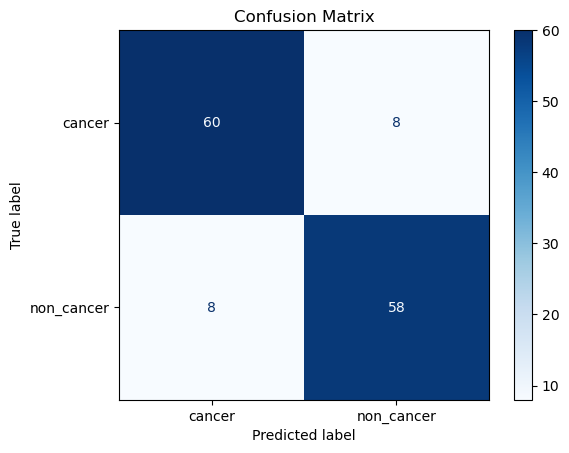

In [ ]:
class_labels = ['cancer', 'non_cancer']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

In [ ]:
import shutil

In [ ]:
destination_folder=r"C:\Users\user\Documents\Tazin\Oral_Cancer\FN"

In [ ]:
for image_path in false_negative:
    shutil.copy(image_path, destination_folder)

In [ ]:
destination_folder=r"C:\Users\user\Documents\Tazin\Oral_Cancer\TN"
for image_path in true_negative:
    shutil.copy(image_path, destination_folder)

In [ ]:
destination_folder=r"C:\Users\user\Documents\Tazin\Oral_Cancer\TP"
for image_path in true_positive:
    shutil.copy(image_path, destination_folder)

In [ ]:
destination_folder=r"C:\Users\user\Documents\Tazin\Oral_Cancer\FP"
for image_path in false_positive:
    shutil.copy(image_path, destination_folder)